<a href="https://colab.research.google.com/github/jamesgolden1/llms-are-llms/blob/main/notebooks/gemma_3/gemma_3_4B_locally_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install "huggingface_hub[hf_transfer]"

In [2]:
import os
from google.colab import userdata

os.environ["HF_HUB_ENABLE_HF_TRANSFER"]='1'
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [5]:
!git clone https://github.com/jamesgolden1/llms-are-llms.git

Cloning into 'llms-are-llms'...
remote: Enumerating objects: 1172, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 1172 (delta 38), reused 42 (delta 21), pack-reused 1103 (from 2)
Receiving objects: 100% (1172/1172), 51.59 MiB | 11.98 MiB/s, done.
Resolving deltas: 100% (661/661), done.


In [6]:
cd /content/llms-are-llms

/content/llms-are-llms


In [7]:
from src.JacobianAnalyzer import *

In [8]:
from src.JacobianAnalyzer import JacobianAnalyzer as JacobianAnalyzer

In [9]:
from models.gemma_3.gemma_3_forward import model_forward

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['cache_implementation']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


model_forward_error: tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<SubBackward0>)
detached Jacobian error: tensor([ 0.0156,  0.0000,  0.0039,  ...,  0.0391, -0.0469,  0.0117],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<SubBackward0>)
For lowest Jacobian error, run at float32 precision on an A100. You can also run float32 on CPU on an L4 but it is slow.


/content/llms-are-llms/src/JacobianAnalyzer.py:1142: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(['Original Jacobian Reconstruction', 'Identity (locally linear)', 'Detached Jacobian Reconstruction'],'upper left')


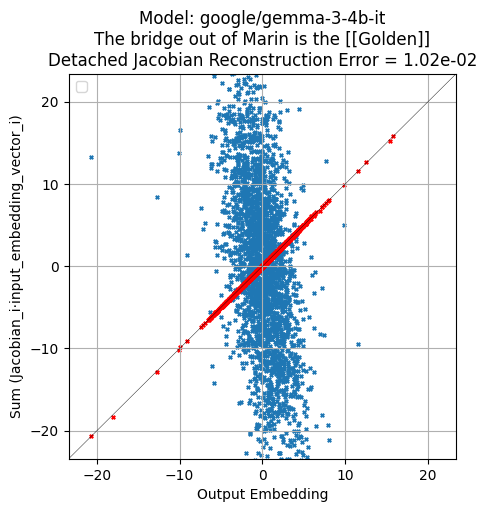

Computing SVD for token position 0
Computing SVD for token position 1
Computing SVD for token position 2
Computing SVD for token position 3
Computing SVD for token position 4
Computing SVD for token position 5
Computing SVD for token position 6
Computing SVD for token position 7
Token 0, U 0, mag=8.15:  one    most  only  Golden  main  "  best
Token 1, U 0, mag=1.40:  only  one  most  Golden    best  new  main
Token 2, U 0, mag=1.03:  bridge  Bridge  Richmond  truss  Puente  Toll  Golden  Garner
Token 3, U 0, mag=0.46:  bridge  Golden  Bridge  Puente  Highway  cause  Richmond  one
Token 4, U 0, mag=0.53:  bridge  Puente  Golden  Bridge  Highway  Marin  Richmond  toll
Token 5, U 0, mag=2.09: 蠡  Marin  Sonoma  Contra Marin  Richmond contra  Doyle
Token 6, U 0, mag=0.58:  bridge  Golden  Bridge  Puente  Highway  Bay  Brooklyn  Interstate
Token 7, U 0, mag=0.74:  bridge  Bridge  world  Brooklyn  way  Golden  famous  infamous
Mode: singular_vectors


/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 

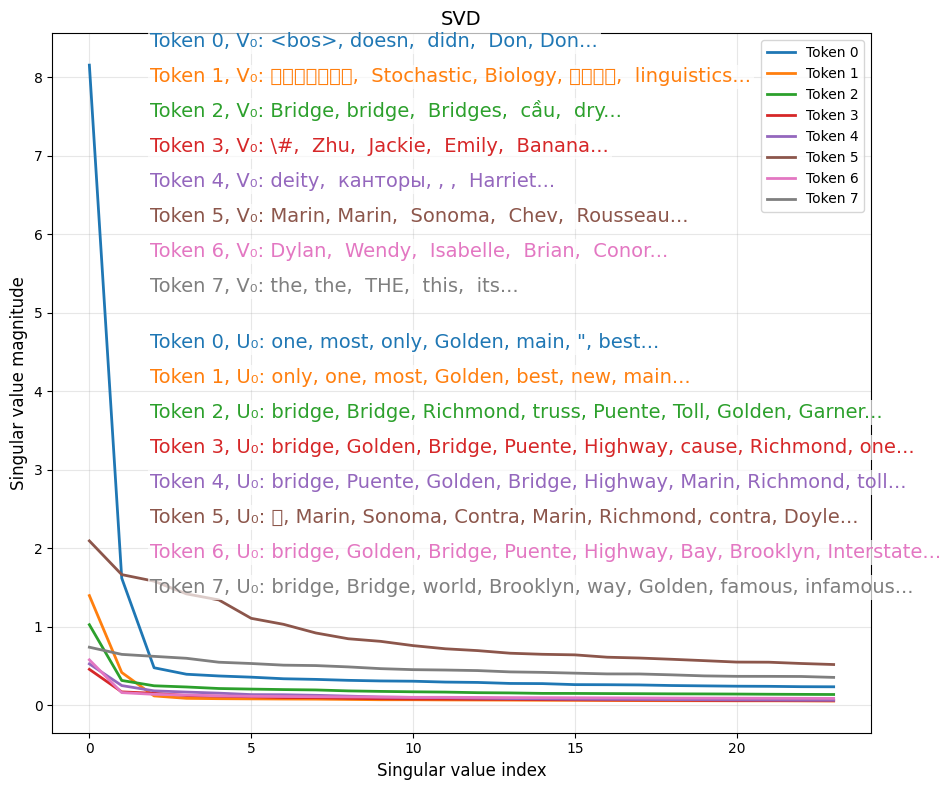

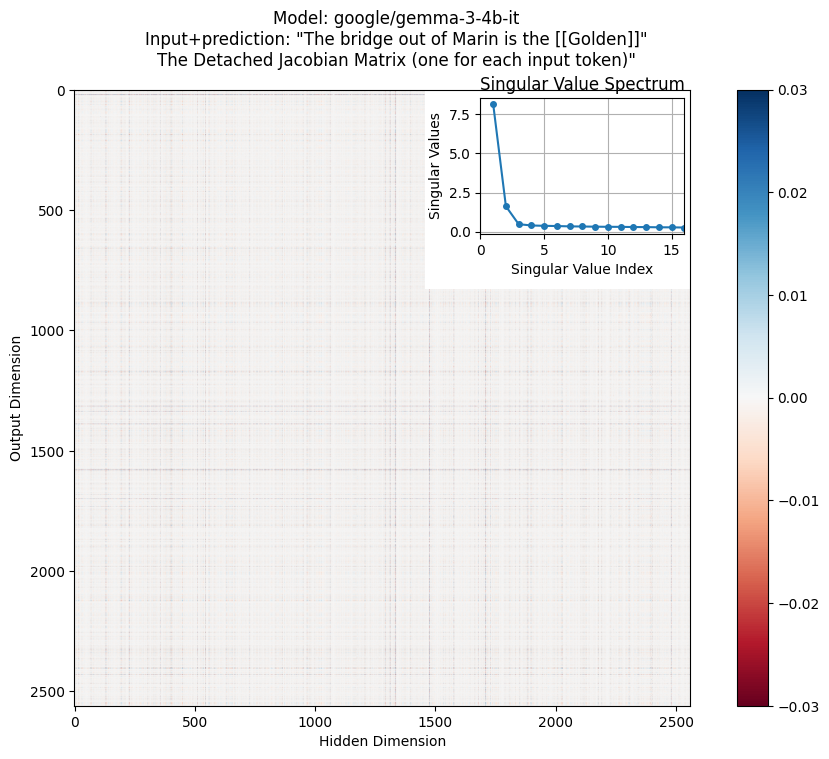

CPU times: user 1min 40s, sys: 10.4 s, total: 1min 51s
Wall time: 52.2 s


In [10]:
#@title Run Jacobian Analysis
%%time
# %%writefile run_llama.py
import os
import gc
import torch
import argparse

setattr(JacobianAnalyzer, 'model_forward', model_forward)

run_all = False

# Initialize the analyzer

analyzer = JacobianAnalyzer(model_name="google/gemma-3-4b-it", load_model=False)
analyzer = JacobianAnalyzer(model_name="google/gemma-3-4b-it", load_model=True)

# text = 'The Golden'
text = 'The bridge out of Marin is the'
max_new_tokens=1
temperature=1e-6

# Generate output
analyzer.generate(text, max_new_tokens, temperature);

# # # Compute Jacobian
analyzer.compute_jacobian()
analyzer.compute_jacobian_nonlinear()
analyzer.plot_jacobian_comparison(text,filename_png="fig3")

# analyzer.compute_jacobian_row_col_norm(n_components=8)#, svs=1)
# analyzer.plot_singular_values(mode="row_col_vectors",filename_png="fig4_col")

analyzer.compute_jacobian_svd(n_components=24, svs=1)
analyzer.plot_singular_values(title="SVD",filename_png="fig4_svd")

analyzer.plot_jacobian_image(filename_png="fig2")

if run_all:
    layerlist=list(range(1,32))
    # layerlist.extend([26,27])
    analyzer.compute_jacobian_layers_svd(layerlist=layerlist,n_components=24,svs=8)#,filename="fig5_svd_layers_llama_3_2")
    analyzer.plot_singular_values(title="SVD Layers",mode='singular_vectors_layers',key='layer',filename_png="fig5_svd_layers")

    analyzer.compute_jacobian_layers_svd(layerlist=layerlist,n_components=4,svs=2,key='mlp')#,filename="fig5_svd_layers_llama_3_2_mlp")
    analyzer.plot_singular_values(title="SVD MLP",mode='singular_vectors_layers',key='mlp',filename_png="fig5_svd_mlp")

    analyzer.compute_jacobian_layers_svd(layerlist=layerlist,n_components=4,svs=2,key='attn')#,filename="fig5_svd_layers_llama_3_2_attn")
    analyzer.plot_singular_values(title="SVD Attn",mode='singular_vectors_layers',key='attn',filename_png="fig5_svd_attn")

    analyzer.plot_path(filename_png="fig6_path")
    analyzer.plot_dimensionality(filename_png="fig6_dimensionality")

    analyzer.compute_jacobian_layers_svd(layerlist=layerlist,layer_mode='layerwise',n_components=4,svs=2)#,filename="fig5_svd_layers_llama_3_2")
    analyzer.plot_singular_values(title="SVD Layers",mode='singular_vectors_layers_layerwise',key='layer',filename_png="fig5_svd_layers_layerwise")

    analyzer.compute_jacobian_layers_svd(layerlist=layerlist,layer_mode='layerwise',n_components=4,svs=2,key='mlp')#,filename="fig5_svd_layers_llama_3_2_mlp")
    analyzer.plot_singular_values(title="SVD MLP",mode='singular_vectors_layers_layerwise',key='mlp',filename_png="fig5_svd_mlp_layerwise")

    analyzer.compute_jacobian_layers_svd(layerlist=layerlist,layer_mode='layerwise',n_components=4,svs=2,key='attn')#,filename="fig5_svd_layers_llama_3_2_attn")
    analyzer.plot_singular_values(title="SVD Attn",mode='singular_vectors_layers_layerwise',key='attn',filename_png="fig5_svd_attn_layerwise")

    analyzer.plot_path(filename_png="fig6_dimensionality_layerwise")

# # if __name__ == "__main__":
# #     main()

In [11]:
analyzer.device

'cuda'

In [12]:
# analyzer.model_mm.generate(
#                           **analyzer.inputs,
#                           max_new_tokens=1,
#                           return_dict_in_generate=True,
#                           output_scores=True,
#                           past_key_values=None,
#                           use_cache=True,
#                           output_hidden_states=True,
#                           temperature=.001)